In [1]:
%matplotlib inline
import typhon as ty
import typhon.arts.xml as axml
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
ty.plots.styles.use()

In [2]:
abslookup_lm = axml.load('abslookup_lm.xml')
abslookup_nolm = axml.load('abslookup_nolm.xml')

In [3]:
co2_lm = abslookup_lm.absorptioncrosssection[0,3,:,:]
co2_nolm = abslookup_nolm.absorptioncrosssection[0,3,:,:]


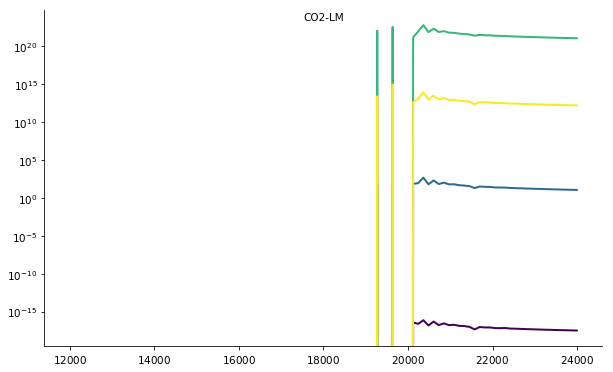

In [4]:
ty.plots.arts_lookup.plot_lookup_xsec(abslookup_lm, [0, 10, 20, 40], species=[["CO2-LM-*-*-*"]])

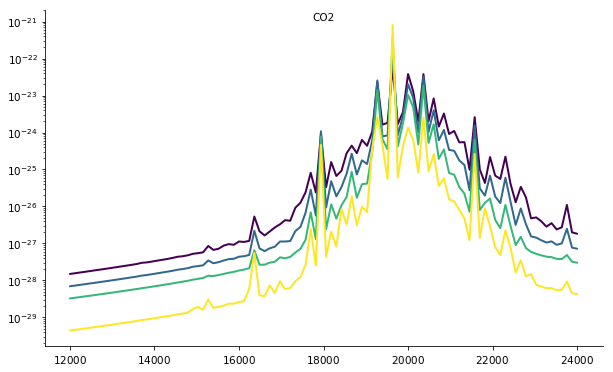

In [5]:
fig, ax = plt.subplots()
ty.plots.arts_lookup.plot_lookup_xsec(abslookup_nolm, [0, 10, 20, 40], species=[["CO2-*-*-*"]], ax=ax)

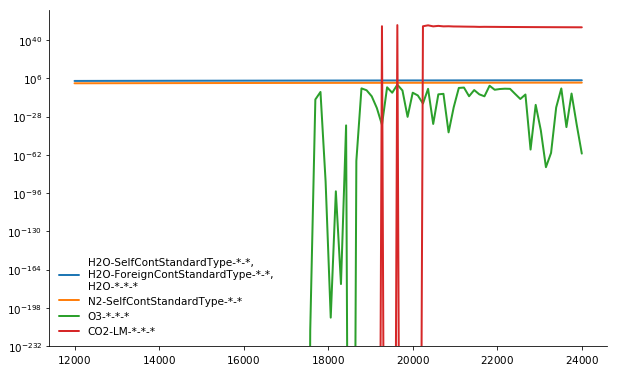

In [6]:
op = ty.plots.arts_lookup.calc_opacity_from_lookup(abslookup_lm)
ty.plots.arts_lookup.plot_lookup_opacity(abslookup_lm, op)

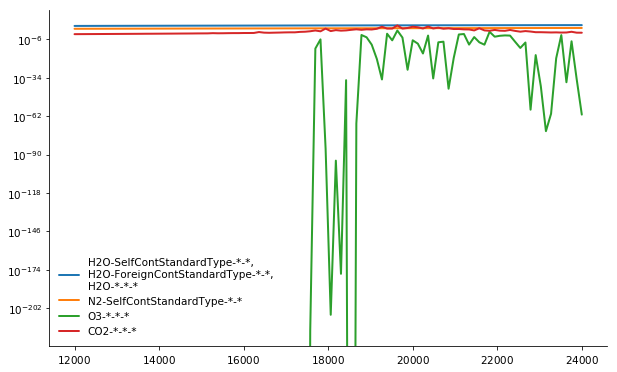

In [7]:
op = ty.plots.arts_lookup.calc_opacity_from_lookup(abslookup_nolm)
ty.plots.arts_lookup.plot_lookup_opacity(abslookup_nolm, op)

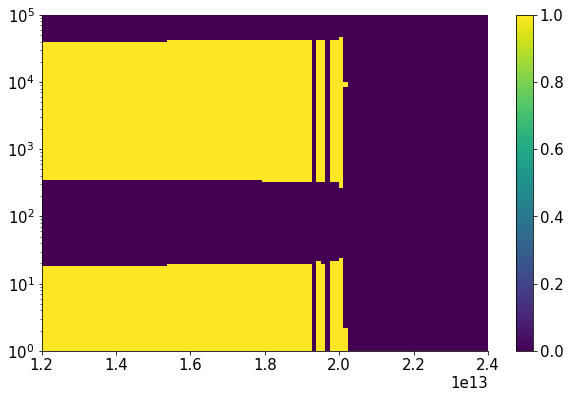

In [8]:
fig, ax = plt.subplots()
y, x = np.meshgrid(abslookup_lm.pressuregrid, abslookup_lm.frequencygrid)
cax = ax.pcolormesh(x, y, (co2_lm<-0.1).astype(int))
fig.colorbar(cax)
ax.set_yscale('log')
